# Identifying Invasive Ductal Carcinoma Pt. 1D
#### Using sci-kit learn to test 1-dimensional regression model accuracy on tissue sample images

In [7]:
import pandas as pd
pd.options.display.max_rows = 25
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
from PIL import Image
%matplotlib inline

### Sample Images

In [8]:
image = Image.open(
    'Desktop/IDC_regular_ps50_idx5/8863/1/8863_idx5_x1001_y1501_class1.png')
image.show()

In [9]:
greyscale_image = image.convert('L')
greyscale_image.show()

### Import Datasets

In [10]:
benign_rgb = np.load('Desktop/ML/benign_subset_rgb.npy')
malignant_rgb = np.load('Desktop/ML/malignant_subset_rgb.npy')
benign_grey = np.load('Desktop/ML/benign_subset_grey.npy')
malignant_grey = np.load('Desktop/ML/malignant_subset_grey.npy')

In [11]:
total_images_rgb = np.concatenate((benign_rgb, malignant_rgb))
total_images_grey = np.concatenate((benign_grey, malignant_grey))

In [26]:
X_rgb = total_images_rgb
X_grey = total_images_grey
Y1 = np.zeros((len(benign_rgb), ), dtype=int)
Y2 = np.ones((len(malignant_rgb), ), dtype=int)
Y = np.concatenate((Y1, Y2))
print(len(X_rgb))
print(len(Y1))
print(len(Y2))

15000
5000
10000


#### Subset Again

In [27]:
X_rgb = X_rgb[3000:7000]
Y = Y[3000:7000]
X_grey = X_grey[3000:7000]

In [28]:
# how many images?

print('Total number of images : {}'.format(len(Y)))
print('Number of images without cancer : {}'.format(np.sum(Y == 0)))
print('Number of images with cancer : {}'.format(np.sum(Y == 1)))
print('Percentage of positive images : {:.2f}%'.format(100 * np.mean(Y)))

# What is the size of the images ?

print(
    'Color image shape (number of rows, number of columns, channels RGB): {}'.
    format(X_rgb[0].shape))
print(
    'Grey image shape (number of rows, number of columns, channels Greyscale): {}'.
    format(X_grey[0].shape))

Total number of images : 4000
Number of images without cancer : 2000
Number of images with cancer : 2000
Percentage of positive images : 50.00%
Color image shape (number of rows, number of columns, channels RGB): (50, 50, 3)
Grey image shape (number of rows, number of columns, channels Greyscale): (50, 50, 1)


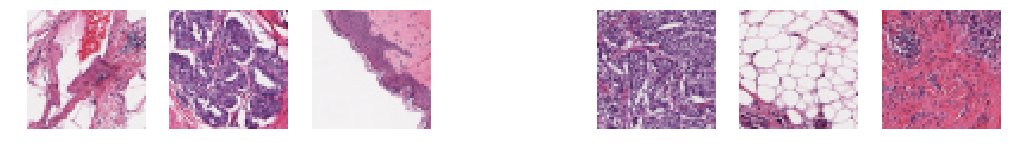

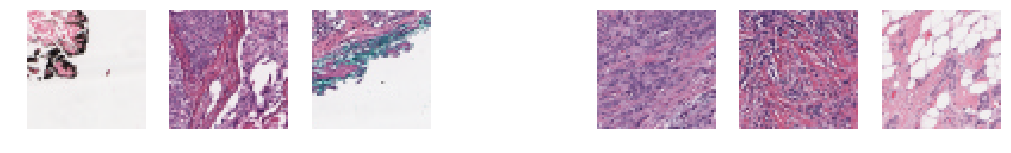

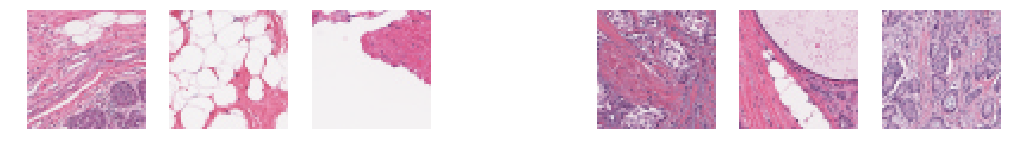

In [29]:
# Looking at some images

imgs0 = benign_rgb  # images with label 0 = no cancer, negative image
imgs1 = malignant_rgb  # images with label 1 =    cancer, positive image

batch = 0  # Each batch plot 50 negative images on the left and 50 positive images on the right

for row in range(3):
    plt.figure(figsize=(20, 10))
    for col in range(3):
        plt.subplot(1, 8, col + 1)
        plt.imshow(imgs0[50 * batch + 5 * row + col])
        plt.axis('off')
        plt.subplot(1, 8, col + 5)
        plt.imshow(imgs1[50 * batch + 5 * row + col])
        plt.axis('off')

### Running Regression on Color

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_rgb, Y, test_size=0.2)

# Reduce Sample Size for DeBugging
#X_train = X_train[0:100]
#Y_train = Y_train[0:100]
#X_test = X_test[0:100]
#Y_test = Y_test[0:100]

print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

3200
800
3200
800
Training Data Shape: (3200, 50, 50, 3)
Testing Data Shape: (800, 50, 50, 3)


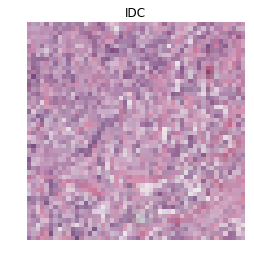

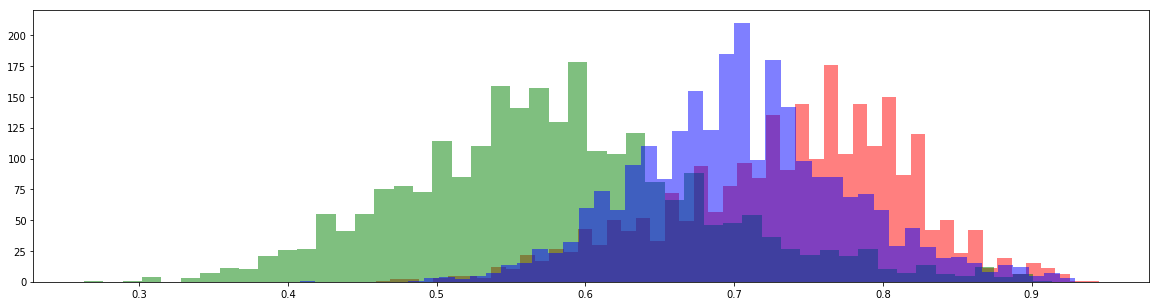

In [31]:
# We look at RGB histograms (represent colors). Histogram counts the number of pixels with a certain intensity
# between 0 and 255 for each color red, green and blue. A peak at 255 for all colors mean a lot of white !

# Try 0, 1, 2.. for negative images and -1, -2, -3 for positive images and compare the histograms.
i = -1
xi = X_rgb[i]

plt.imshow(xi)
plt.axis('off')
plt.title('IDC' if Y[i] else 'not IDC')

plt.figure(figsize=(20, 5))
n_bins = 50
plt.hist(xi[:, :, 0].flatten(), bins=n_bins, lw=0, color='r', alpha=0.5)
plt.hist(xi[:, :, 1].flatten(), bins=n_bins, lw=0, color='g', alpha=0.5)
plt.hist(xi[:, :, 2].flatten(), bins=n_bins, lw=0, color='b', alpha=0.5)

In [33]:
# Now try to classify

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

# Import models that will later be used
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Make Data 1D for compatability with standard classifiers

X_trainShape = X_train.shape[1] * X_train.shape[2] * X_train.shape[3]
X_testShape = X_test.shape[1] * X_test.shape[2] * X_test.shape[3]

X_train = X_train.reshape(X_train.shape[0], X_trainShape)
X_test = X_test.reshape(X_test.shape[0], X_testShape)

In [34]:
# runLogisticRegression
def runLogisticRegression(a, b, c, d):
    """Run LogisticRegression w/ Kfold CV"""
    model = LogisticRegression()
    model.fit(a, b)
    kfold = model_selection.KFold(n_splits=10)
    accuracy = model_selection.cross_val_score(
        model, c, d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean()
    stdev = accuracy.std()
    print(
        'LogisticRegression - Training set accuracy: %s (%s)' % (mean, stdev))
    print('')


runLogisticRegression(X_train, Y_train, X_test, Y_test)

LogisticRegression - Training set accuracy: 0.75875 (0.034932971531205295)



Base accuracy of 1D regression is around 75%. This is better than random guessing (50%) but far from the goal of 85% or higher accuracy

In [ ]:
# Compare Performance of Classification Algorithms
def compareABunchOfDifferentModelsAccuracy(a, b, c, d):
    """
    compare performance of classifiers on X_train, X_test, Y_train, Y_test
    http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
    http://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score
    """
    print('')
    print('Compare Multiple Classifiers:')
    print('')
    print('K-Fold Cross-Validation Accuracy:')
    print('')
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVM', SVC()))
    models.append(('LSVM', LinearSVC()))
    models.append(('GNB', GaussianNB()))
    models.append(('DTC', DecisionTreeClassifier()))
    #models.append(('GBC', GradientBoostingClassifier()))
    #models.append(('LDA', LinearDiscriminantAnalysis()))
    resultsAccuracy = []
    names = []
    for name, model in models:
        model.fit(a, b)
        kfold = model_selection.KFold(n_splits=10)
        accuracy_results = model_selection.cross_val_score(
            model, c, d, cv=kfold, scoring='accuracy')
        resultsAccuracy.append(accuracy_results)
        names.append(name)
        accuracyMessage = "%s: %f (%f)" % (name, accuracy_results.mean(),
                                           accuracy_results.std())
        print(accuracyMessage)
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison: Accuracy')
    ax = fig.add_subplot(111)
    plt.boxplot(resultsAccuracy)
    ax.set_xticklabels(names)
    ax.set_ylabel('Cross-Validation: Accuracy Score')
    plt.show()
    return


compareABunchOfDifferentModelsAccuracy(X_train, Y_train, X_test, Y_test)


def defineModels():
    """
    This function just defines each abbreviation used in the previous function (e.g. LR = Logistic Regression)
    """
    print('')
    print('LR = LogisticRegression')
    print('RF = RandomForestClassifier')
    print('KNN = KNeighborsClassifier')
    print('SVM = Support Vector Machine SVC')
    print('LSVM = LinearSVC')
    print('GNB = GaussianNB')
    print('DTC = DecisionTreeClassifier')
    #print('GBC = GradientBoostingClassifier')
    #print('LDA = LinearDiscriminantAnalysis')
    print('')
    return


defineModels()

Random Forest and K-nearest neighbors both improve upon logistic regression but only to around 78% accuracy

### On Greyscale

We expect that accuracy will be lower for greyscale than it is for color, bbut since there is effectively 1/3 of the information, the computations should be faster. If the greyscale accuracy is near the color accuracy, then we will continue to test the greyscale in the subsequent CNN models. Otherwise, it will not be worth the time to do so

In [36]:
from sklearn.model_selection import train_test_split
X_train_g, X_test_g, Y_train_g, Y_test_g = train_test_split(
    X_grey, Y, test_size=0.2)

# Reduce Sample Size for DeBugging
#X_train = X_train[0:100]
#Y_train = Y_train[0:100]
#X_test = X_test[0:100]
#Y_test = Y_test[0:100]

print(len(X_train_g))
print(len(X_test_g))
print(len(Y_train_g))
print(len(Y_test_g))

print("Training Data Shape:", X_train_g.shape)
print("Testing Data Shape:", X_test_g.shape)

3200
800
3200
800
Training Data Shape: (3200, 50, 50, 1)
Testing Data Shape: (800, 50, 50, 1)


In [37]:
# Make Data 1D for compatability with standard classifiers

X_trainShape_g = X_train_g.shape[1] * X_train_g.shape[2] * X_train_g.shape[3]
X_testShape_g = X_test_g.shape[1] * X_test_g.shape[2] * X_test_g.shape[3]

X_train_g = X_train_g.reshape(X_train_g.shape[0], X_trainShape_g)
X_test_g = X_test_g.reshape(X_test_g.shape[0], X_testShape_g)

In [38]:
#runLogisticRegression
runLogisticRegression(X_train_g, Y_train_g, X_test_g, Y_test_g)

LogisticRegression - Training set accuracy: 0.5387500000000001 (0.032811011871016725)



While we predicted that accuracy would be lower for greyscale images, 54% was lower than expected. The tradeoff in speed of computation vs accuracy is not worth it


Compare Multiple Classifiers:

K-Fold Cross-Validation Accuracy:

LR: 0.538750 (0.032811)
RF: 0.471250 (0.058644)
KNN: 0.487500 (0.034911)
SVM: 0.525000 (0.035795)
LSVM: 0.526250 (0.038099)
GNB: 0.461250 (0.040098)
DTC: 0.498750 (0.050451)


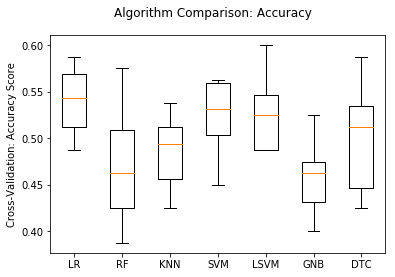


LR = LogisticRegression
RF = RandomForestClassifier
KNN = KNeighborsClassifier
SVM = Support Vector Machine SVC
LSVM = LinearSVC
GNB = GaussianNB
DTC = DecisionTreeClassifier



In [39]:
# Compare Performance of Classification Algorithms
compareABunchOfDifferentModelsAccuracy(X_train_g, Y_train_g, X_test_g,
                                       Y_test_g)

defineModels()

We found that accuracy was not improved by other models and will not continue to test greyscale in the CNN models